In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [3]:
df = pd.read_csv('../data/users.csv')

In [4]:
df.shape

(11664, 14)

In [ ]:
df.total_checkins.describe

In [15]:
df.isna().sum()

id                        0
user_name                 0
first_name                2
last_name              1869
location               5851
bio                    7877
total_badges              0
total_friends             0
total_checkins            0
total_beers               0
total_created_beers       0
total_photos              0
date_joined               0
dtype: int64

In [18]:
df.total_checkins.describe()

count    11664.000000
mean      1845.233882
std       2693.284122
min          0.000000
25%        277.750000
50%        851.000000
75%       2304.000000
max      49150.000000
Name: total_checkins, dtype: float64

In [19]:
df.total_beers.describe()

count    11664.000000
mean      1524.281121
std       2153.718796
min          0.000000
25%        253.000000
50%        752.000000
75%       1926.500000
max      42570.000000
Name: total_beers, dtype: float64

In [16]:
df.head()

,id,user_name,first_name,last_name,location,bio,total_badges,total_friends,total_checkins,total_beers,total_created_beers,total_photos,date_joined
0,6912548,Lotry,Evgenii,Shalov,Saint Petersburg/Orel,NaN,1744,16,1301,1118,0,771,"Fri, 12 Jul 2019 20:45:18 +0000"
1,9545796,Andrew84-Kino,Андрей,Р,NaN,NaN,441,32,276,255,2,269,"Wed, 19 Jan 2022 07:04:22 +0000"
2,9803766,sankovmd,Максим,Саньков,NaN,@maximsankov,497,15,335,327,0,334,"Tue, 17 May 2022 13:44:47 +0000"
3,8277564,artem_5716,Artem,NaN,Yerevan,Join @vanbeercommunity on TG if you are in Yer...,602,48,356,287,0,351,"Tue, 22 Sep 2020 16:29:55 +0000"
4,8423510,Oleg_Sorokin,Oleg,Sorokin,Orel & Yerevan,NaN,1950,39,1664,1511,4,1650,"Sun, 15 Nov 2020 18:57:42 +0000"


In [4]:
df.total_checkins.quantile(0.99)

12684.270000000057

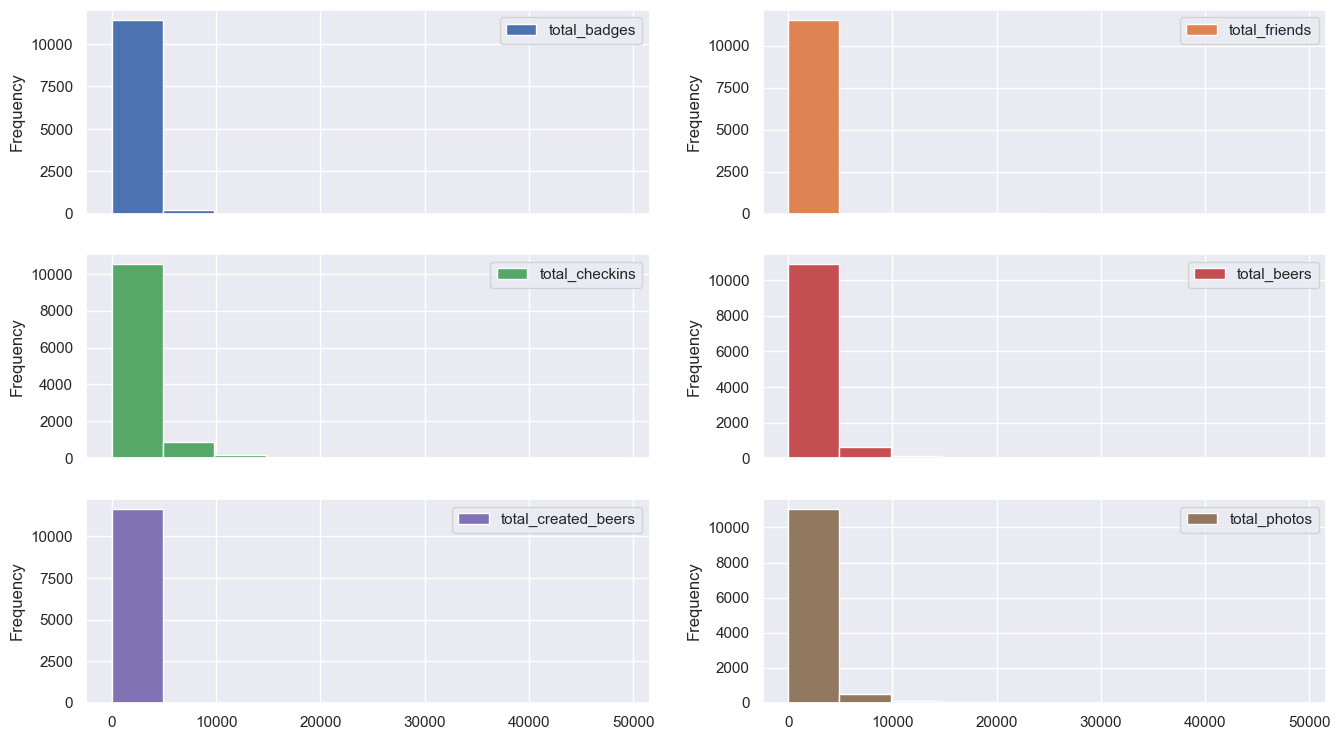

In [63]:
df.drop(columns=['id']).plot.hist(subplots=True, layout=(3, 2));

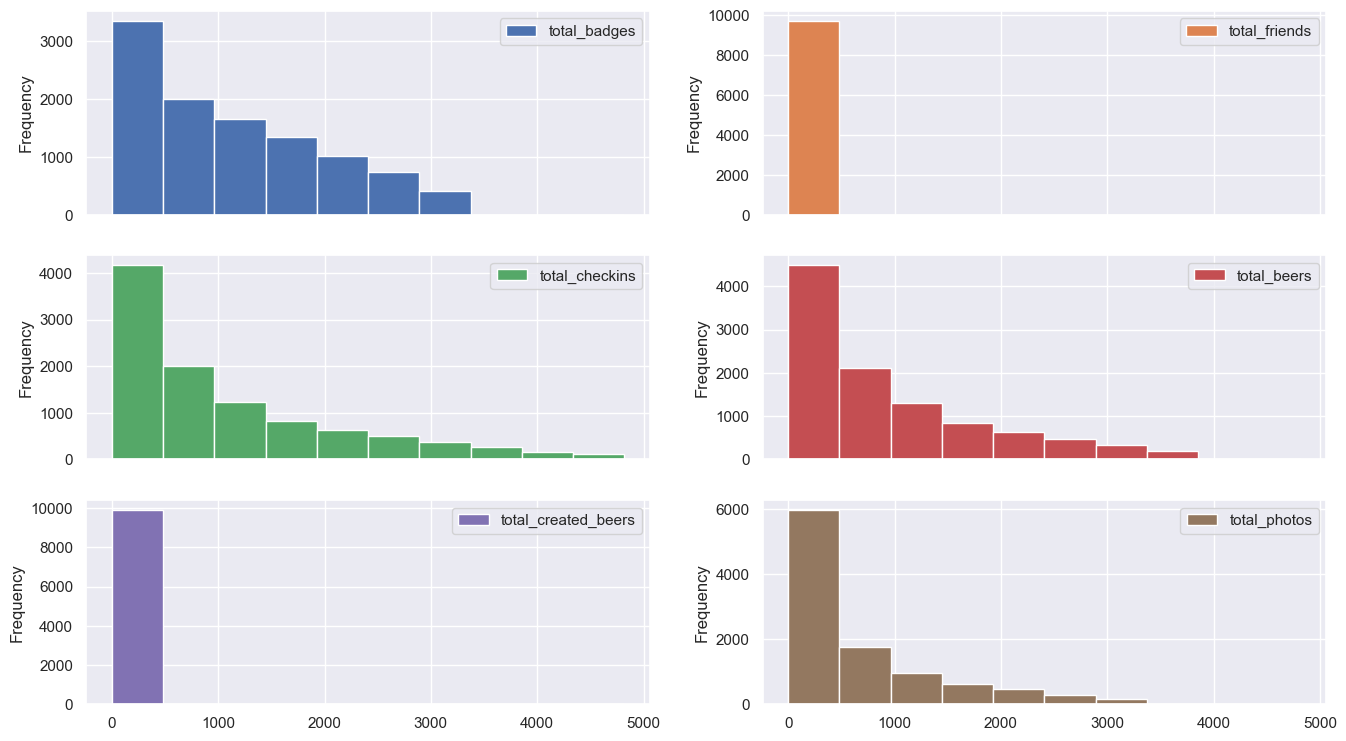

In [114]:
df = pd.read_csv('../data/users.csv')
numeric_columns = df.drop(columns=['id']).select_dtypes(include=np.number).columns
df_quantile = pd.DataFrame(columns=numeric_columns)
# df.drop(columns=['id']).select_dtypes(include=np.number)
for column in numeric_columns:
	# df_quantile[column] = df[column].quantile()
	df_quantile[column] = df[df[column] < df[column].quantile(0.90)][column]
	# df_quantile[column] = [df[column].quantile(0.75) for column in df.drop(columns=['id']).select_dtypes(include=np.number)]
df_quantile.plot.hist(subplots=True, layout=(3,2), figsize=(16,9));

In [51]:
print(len(df[df.total_checkins == 0]))
len(df[df.total_checkins > 12000])

42


148

In [157]:
spb_names = ['Petersburg', 'Saint P.','Saint pe', 'Saint-P',  'SPb', 'Saint-P', 'Spb', 'SPB', 'spb', 'RU.SPB', 'Saint-p', 'SAINT-PETERSBURG']
any(name in 'Saint-Petersburg' for name in spb_names)

True

In [9]:
spb_names = ['Petersburg', 'Saint P.', 'Saint pe', 'Saint-P', 'SPb', 'Saint-P', 'Spb', 'SPB', 'spb', 'RU.SPB', 'Saint-p', 'SAINT-PETERSBURG']
msc_names = ['Moscow', 'Msk', 'Moskow']

def group_by_city(value):
    if 'Minsk' in value or 'Belarus' in value:
        return 'Belarus'
    # if 'Moscow' in value:
    if any(name in value for name in msc_names):
        return 'Moscow'
    if any(name in value for name in spb_names):
        return 'St. Petersburg'
    if 'Chicago' in value:
        return 'Chicago'
    return value


def group_by_country(value):
    if ('Minsk' in value or 'Belarus' in value):
        value = 'Belarus'
    if ('Moscow' in value or 'Petersburg' in value):
        value = 'Russia'

In [10]:
df['location_grouped'] = df.location.dropna().apply(group_by_city)
# df['location_grouped'] = df.location.dropna().apply(lambda x: group_by_city(x))

In [12]:
# df.location_grouped.dropna().value_counts().iloc[:20]
a = df.location_grouped.dropna().value_counts()
# a.to_csv('a.csv')
a

Moscow                      696
St. Petersburg              323
Belarus                     266
Russia                       57
Chicago                      44
                           ... 
Everett, Wa                   1
Albuquerque                   1
Columbia, SC                  1
Correggio, Reggio Emilia      1
Rayzan'                       1
Name: location_grouped, Length: 3054, dtype: int64

In [11]:
df.location.dropna().value_counts().iloc[:20]

Moscow              517
Minsk               150
Saint-Petersburg     88
Russia               57
Saint Petersburg     40
Moscow               39
Moscow, Russia       38
Novosibirsk          30
Krasnodar            28
Minsk, Belarus       27
Belarus              26
??????               25
Samara               23
St. Petersburg       22
Chicago              20
London               19
Chelyabinsk          17
St.Petersburg        15
Belarus, Minsk       14
Voronezh             14
Name: location, dtype: int64

In [13]:
df.isna().sum()

id                        0
user_name                 0
first_name                2
last_name              1869
location               5851
bio                    7877
total_badges              0
total_friends             0
total_checkins            0
total_beers               0
total_created_beers       0
total_photos              0
date_joined               0
location_grouped       5851
dtype: int64

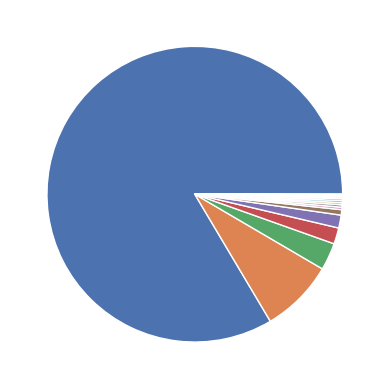

In [164]:
plt.pie(a.dropna().value_counts().iloc[:20]);

In [165]:
df.to_csv('users_located.csv', index=False)

In [ ]:
users_df['joined_datetime'] = pd.to_datetime(users_df['date_joined'], format='%a, %d %b %Y %H:%M:%S %z')

In [2]:
d = pd.read_csv('users_located.csv')

In [3]:
d.head()

,id,user_name,first_name,last_name,location,bio,total_badges,total_friends,total_checkins,total_beers,total_created_beers,total_photos,date_joined,location_grouped
0,6912548,Lotry,Evgenii,Shalov,Saint Petersburg/Orel,NaN,1744,16,1301,1118,0,771,"Fri, 12 Jul 2019 20:45:18 +0000",St. Petersburg
1,9545796,Andrew84-Kino,Андрей,Р,NaN,NaN,441,32,276,255,2,269,"Wed, 19 Jan 2022 07:04:22 +0000",NaN
2,9803766,sankovmd,Максим,Саньков,NaN,@maximsankov,497,15,335,327,0,334,"Tue, 17 May 2022 13:44:47 +0000",NaN
3,8277564,artem_5716,Artem,NaN,Yerevan,Join @vanbeercommunity on TG if you are in Yer...,602,48,356,287,0,351,"Tue, 22 Sep 2020 16:29:55 +0000",Yerevan
4,8423510,Oleg_Sorokin,Oleg,Sorokin,Orel & Yerevan,NaN,1950,39,1664,1511,4,1650,"Sun, 15 Nov 2020 18:57:42 +0000",Orel & Yerevan


In [4]:
d.location_grouped.value_counts()

Moscow                      696
St. Petersburg              323
Belarus                     266
Russia                       57
Chicago                      44
                           ... 
Everett, Wa                   1
Albuquerque                   1
Columbia, SC                  1
Correggio, Reggio Emilia      1
Rayzan'                       1
Name: location_grouped, Length: 3054, dtype: int64